### Stationarity Exercise

In [20]:
# import matplotlib
import matplotlib.pyplot as plt

# import random
import random

# set a random seed
random.seed(5)

import pandas as pd

* generate a NON stationary time-series

* plot the NON stationary series generated above

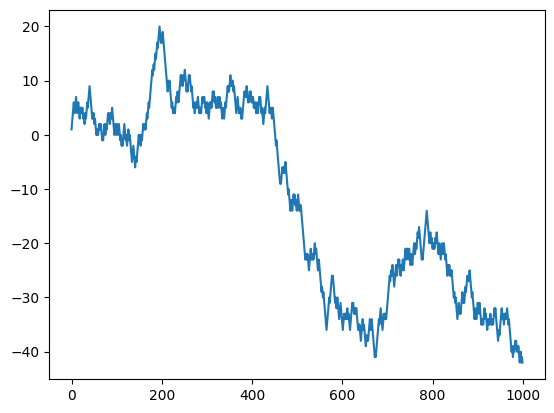

In [21]:
from random import seed
from random import random
from matplotlib import pyplot
seed(5)
non_stationary_series = list()
non_stationary_series.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = non_stationary_series[i-1] + movement
	non_stationary_series.append(value)
pyplot.plot(non_stationary_series)
pyplot.show()

* generate a stationary time-series

* plot the stationary series generated above

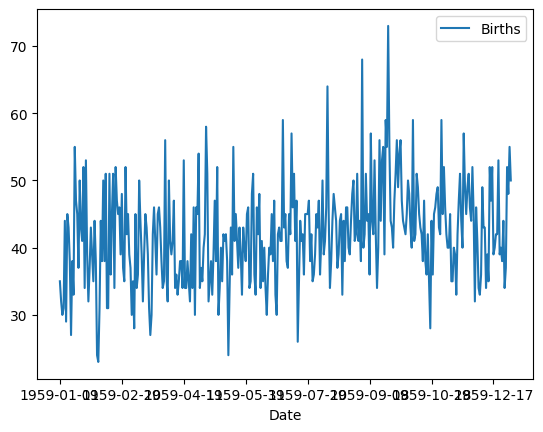

In [22]:
from pandas import read_csv
from matplotlib import pyplot
stationary_series = read_csv('..\daily-total-female-births.csv', header=0, index_col=0)
stationary_series.plot()
pyplot.show()

* Create a function `'ADF_Stationarity_Test'` with the input parameters `timeseries` and `significance_level` which: 
    * prints the adfuller test results
    * prints the conclusion stating whether timeseries is stationary based on the siginificance level (input parameter of function)


In [23]:
def ADF_Stationarity_Test(timeseries, significance_level):
    from statsmodels.tsa.stattools import adfuller
    import pandas as pd
    timeseries = pd.DataFrame(timeseries)
    X = timeseries.values
    significance_level_trans = round(significance_level*100)
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
	    print('\t%s: %.3f' % (key, value))
    key = str(significance_level_trans)+'%'
    if result[0] <= result[4][key]:
        print('Based on a significance level of %s, this time series is stationary' % significance_level)
    else:
        print('Based on a significance level of %s, this time series is non-stationary' % significance_level)

* Apply the function `'ADF_Stationarity_Test'` to find out whether the timeseries generated above are stationary.

In [24]:
ADF_Stationarity_Test(timeseries=stationary_series, significance_level=0.05)

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
Based on a significance level of 0.05, this time series is stationary


In [25]:
ADF_Stationarity_Test(timeseries=non_stationary_series, significance_level=0.05)

ADF Statistic: -0.278714
p-value: 0.928465
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
Based on a significance level of 0.05, this time series is non-stationary


* Apply a suitable transformation to make the NON stationary time series stationary.

In [32]:
non_stationary_series = pd.DataFrame(non_stationary_series)
non_stationary_series_2 = non_stationary_series.diff().dropna()

In [33]:
non_stationary_series_2

,0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
...,...
995,1.0
996,-1.0
997,-1.0
998,1.0


* plot the transformed time series

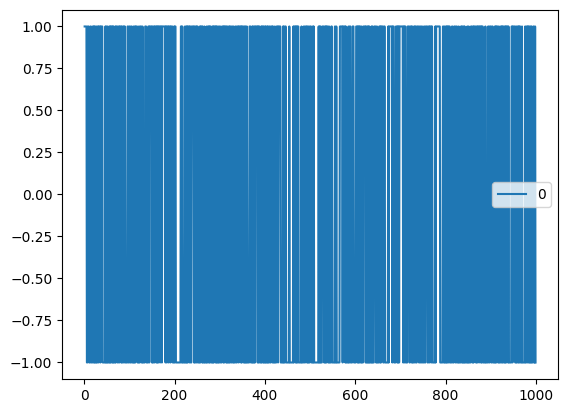

In [34]:
non_stationary_series_2.plot()
pyplot.show()

* Apply the function `'ADF_Stationarity_Test'` to find out whether the transformed timeseries is stationary.

In [35]:
ADF_Stationarity_Test(timeseries=non_stationary_series_2, significance_level=0.05)

ADF Statistic: -30.868136
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
Based on a significance level of 0.05, this time series is stationary
